In [2]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import h5py

[n_target_freq * n_channels * points * n_trials]

In [54]:
subject1 = sc.io.loadmat("../data/s1.mat")
data1 = subject1['eeg']
data1 = data1.transpose(0,3,1,2)
data1 *= 1e-6

In [55]:
srate = 256
n_targets = 12
n_channels = 8
n_points = 1114
n_trials = 15
points = np.arange(0, n_points)

target_freq = [9.25, 11.25, 13.25, 9.75, 11.75, 13.75, 10.25, 12.25, 14.25, 10.75, 12.75, 14.75]

**Preparing data for Epoch Object** \
We define 15 `Epoch` objects for different stimualtion frequencies, for a given subject

In [ ]:
subject1data : list[mne.EpochsArray] = []

for i in range(n_targets):
    epoched_data = mne.EpochsArray(
        data1[i,:,:,:],
        info = mne.create_info(n_channels, srate, ch_types='eeg'),
        verbose=False
        )
    subject1data.append(epoched_data)

We generate `Evoked` objects by performing mean over all it's trials

In [86]:
mean_subject1_data : list[mne.EvokedArray] = [data.average(picks='all') for data in subject1data]
tfr_subject1_data : list[mne.time_frequency.AverageTFRArray] = [data.compute_tfr('morlet', freqs=np.arange(3,40,1)) for data in mean_subject1_data]

Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)


Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)


Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_36416\575894219.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Tem

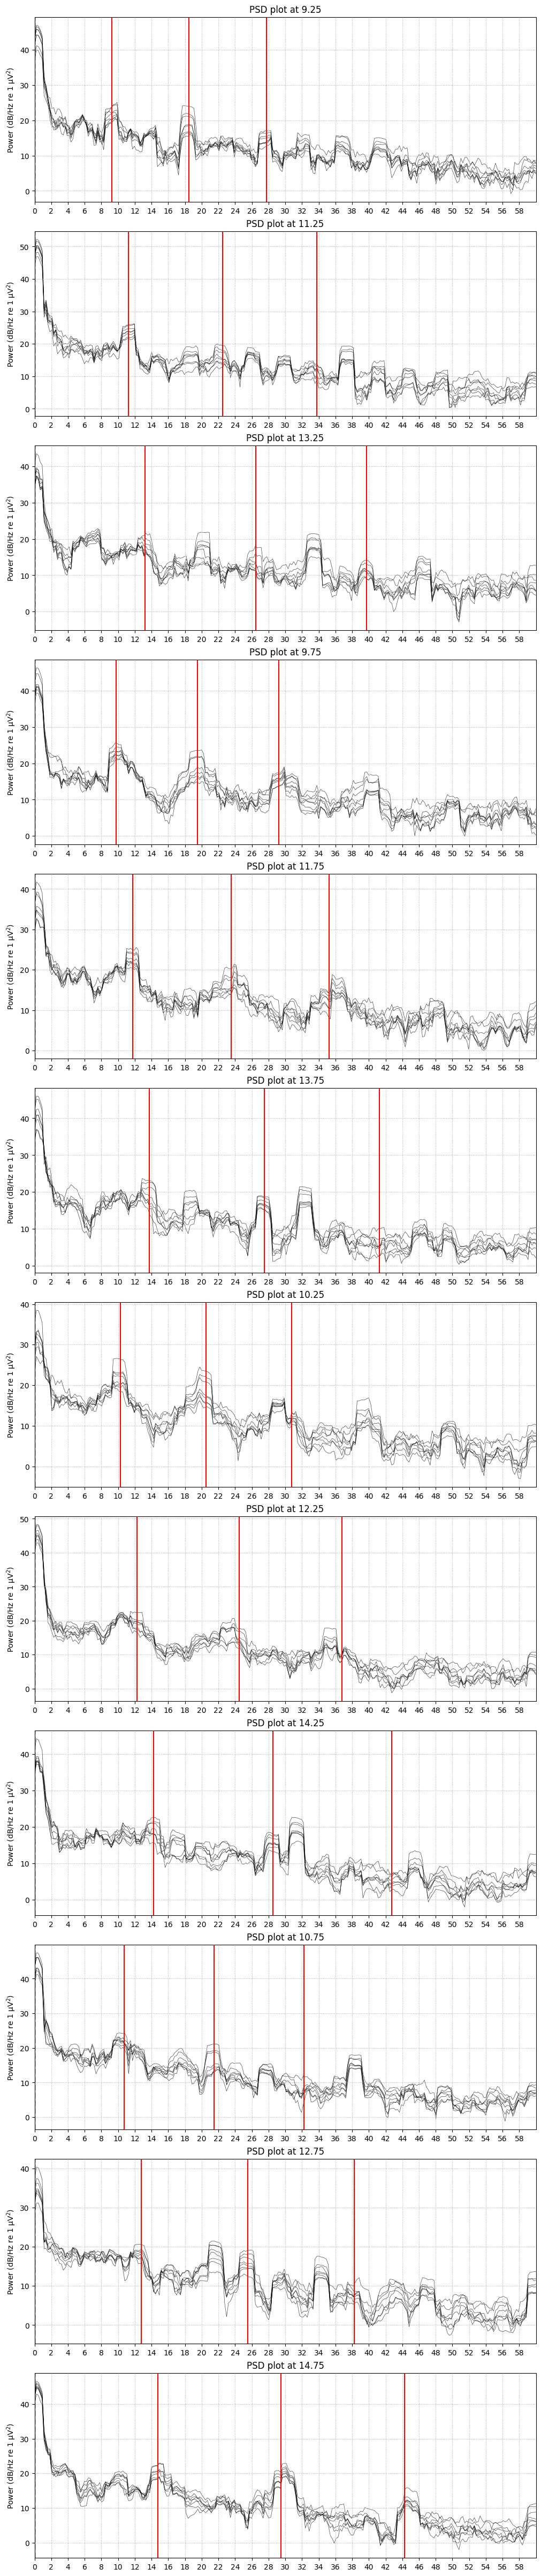

In [ ]:
fig, axes = plt.subplots(n_targets, figsize=(10, 4 * n_targets), constrained_layout=True)
for freq in range(n_targets):
    mean_subject1_data[freq].compute_psd(fmax = 60, verbose=False).plot(axes = axes[freq], show=False)
    axes[freq].set_xlim(0, 60)
    axes[freq].set_xticks(np.arange(0,60,2))
    axes[freq].set_title(f"PSD plot at {target_freq[freq]}")

    for i in range(1,5):
        axes[freq].axvline(x= i*target_freq[freq], color = 'r')

fig.savefig("Power Spectral Density for Subject 1", dpi = 500)

Applying baseline correction (mode: logratio)


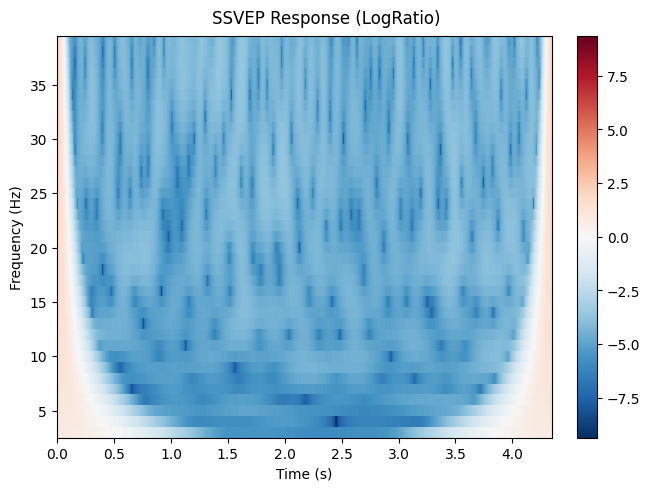

[<Figure size 640x480 with 2 Axes>]

In [50]:
tfr_subject1_data[0].plot(
    picks=[5],
    baseline=(None, None), # Uses the entire time interval as baseline
    mode='logratio',       # Converts power to dB relative to baseline
    title='SSVEP Response (LogRatio)'
)